# Rigidity and Flexibility of Graphs in SageMath

Jan Legerský

2nd Software and Industrial Workshop in Cambridge

[jan.legersky.cz](https://jan.legersky.cz)

## Tools

- [SageMath](http://www.sagemath.org/)
- [Binder](https://mybinder.org/)
- [Documentation](https://jan.legersky.cz/public_files/documentation_rigidflexiblegraphs/) generated from docstrings using [Sphinx](http://sphinx-doc.org/)
- Animated SVG
- [POV-Ray](http://www.povray.org/)

## Basic notions

**Definition**

Let $G=(V_G,E_G)$ be a graph with an edge labeling $\lambda:E_G\rightarrow \mathbb{R}_+$.

A realization $\rho:V_G\rightarrow\mathbb{R}^2$ is called *compatible* with $\lambda$ if
$||\rho(u)-\rho(v)||=\lambda(uv)$ for all $uv\in E_G$.

The labeling $\lambda$ is called

- *(proper) flexible* if the number of (injective) realizations of $G$ compatible with $\lambda$ is infinite,
- *rigid* if the number of realizations of $G$ compatible with $\lambda$ is infinite,

where the counting is up to direct Euclidean isometries.
A graph is called *movable* iff it has a proper flexible labeling.

In [1]:
%load_ext autoreload
%autoreload 2

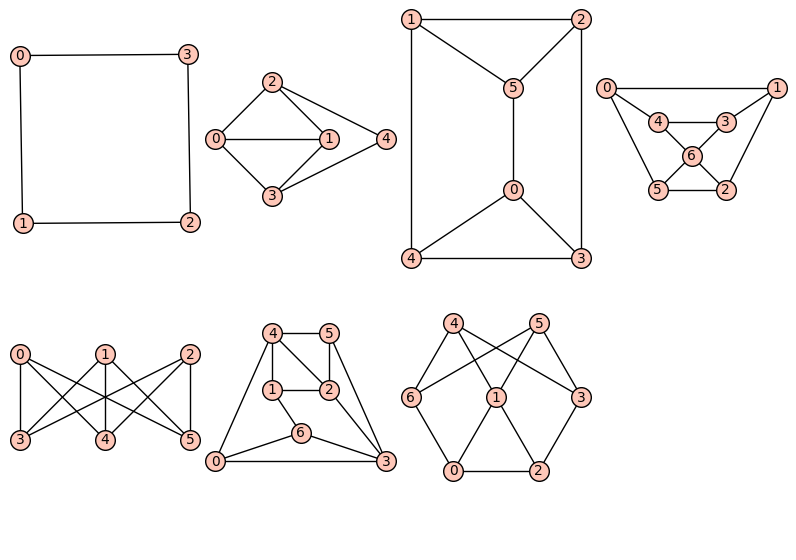

In [5]:
from rigid_and_flexible_graphs.graph_generator import GraphGenerator
from rigid_and_flexible_graphs.rigid_flexible_graph import RigidFlexibleGraph
C4 = RigidFlexibleGraph([[0,1],[1,2],[2,3],[0,3]])
S = GraphGenerator.SmallestFlexibleLamanGraph()
T = GraphGenerator.ThreePrismGraph()
M = GraphGenerator.MaxEmbeddingsLamanGraph(7)
K33 = RigidFlexibleGraph(graphs.CompleteBipartiteGraph(3,3))
H = RigidFlexibleGraph(448412, pos={0 : (-0.5,-0.75), 1 : (0.5,0.5), 2 : (1.5,0.5), 3 : (2.5,-0.75),
                                       4 : (0.5,1.5), 5 : (1.5,1.5), 6 : (1,-0.25)})
Q = GraphGenerator.Q1Graph()
show(*[G.plot() for G in [C4, S, T, M, K33, H, Q]])
# graph with no NAC-coloring

**Theorem** [Pollaczek-Geiringer, Laman]

A graph is *generically rigid*, i.e., a generic realization defines a rigid labeling,
if and only if the graph contains a *Laman* subgraph with the same set of vertices.

A graph $G=(V_G,E_G)$ is called *Laman* if $|E_G| = 2|V_G|-3$, and $|E_H|\leq 2|V_H|-3$ for all subgraphs $H$ of $G$.

In [ ]:
print [G.is_Laman() for G in [C4, S, T, M]]

In [ ]:
show(C4)
C4.is_Laman()

In [ ]:
show(S)
S.is_Laman()

In [ ]:
show(T)
T.is_Laman()

In [ ]:
show(M)
M.is_Laman()

## Rigid graphs - number of realizations

Given a Laman graph $G$ and a rigid labeling $\lambda$, how many compatible realizations are there?

We fix an edge $\bar{u}\bar{v}$ to get a system of equations:

$x_{\bar{u}}=0, y_{\bar{u}}=0, x_{\bar{v}}=\lambda_{\bar{u}\bar{v}}, y_{\bar{v}}=0$,

$(x_u-x_v)^2+(y_u-y_v)^2= \lambda_{uv}^2$ for all $uv \in E_G\setminus\{\bar{u}\bar{v}\}$.

- well-constrained
- the number of complex solutions is the same for generic choices of $\lambda$
- solving using PHC

In [ ]:
# examples - number, real vs. complex, pictures
L = {
    (0, 3): 2,
    (0, 4): 3,
    (0, 5): 5,
    (1, 2): 3,
    (1, 4): 5,
    (1, 5): 4,
    (2, 3): 5,
    (2, 5): 2,
    (3, 4): 4
}
for eq in T.system_of_equations(L, [4,3])[0]:
    show(eq)

In [ ]:
res_RR, res_CC = T.realizations(L,[4,3])
print '# real: ', len(res_RR), '; # complex:', len(res_CC)
print res_CC[0]
show(*[G.plot(pos=rho) for rho in res_RR])

## Flexible labelings

**Definition**

Let $G$ be a graph. A coloring of edges $\delta\colon  E_G\rightarrow \{\text{blue, red}\}$ 
is called a *NAC-coloring*, if it is surjective and for every cycle $C$ in $G$,
either all edges of $C$ have the same color, or
$C$ contains at least 2 edges in each color.

**Theorem** [Grasegger, L., Schicho]

A graph $G$ has a flexible labeling if and only if it has a NAC-coloring.

In [ ]:
# examples of NAC-coloring

from rigid_and_flexible_graphs.NAC_coloring import NACcoloring

from rigid_and_flexible_graphs.graph_motion import GraphMotion

## Construction of a motion from a NAC-coloring

In [ ]:
# grid construction, injective and non-injective
# animations

## Movable graphs

Recall - we look for a **proper** flexible labeling, i.e., infinitely many **injective** realizations

**Definition**
$\DeclareMathOperator{\CDC}{CDC} \newcommand{\cdc}[1]{\CDC(#1)}$
$\DeclareMathOperator{\Upairs}{U} \newcommand{\upairs}[1]{\Upairs(#1)}$

Let $\upairs{G}$ denote the set of all pairs $\{u,v\}\subset V_G$ such that $uv\notin E_G$ and 
there exists a path from $u$ to $v$ which is unicolor for all NAC-colorings $\delta$ of $G$.	
If there exists a sequence of graphs $G=G_0, \dots, G_n$ such that
$G_i=(V_{G_{i-1}},E_{G_{i-1}} \cup \upairs{G_{i-1}})$ for $i\in\{1,\dots,n\}$
and $\upairs{G_n}=\emptyset$,
then the graph $G_n$ is called *the constant distance closure* of $G$, denoted by $\cdc{G}$.

**Theorem** [Grasegger, L., Schicho]

A graph $G$ is movable if and only $\cdc{G}$ is movable.

**Corollary**

If $G$ is movable, then $\cdc{G}$ is not complete.

In [ ]:
# examples, list of graphs satisfying the property

**Lemma** [Grasegger, L., Schicho]

Let $G=(V,E)$ be a graph with an injective embedding $\omega:V\rightarrow\mathbb{R}^3$ such that for every edge 
$uv\in E$, the vector $\omega(u)-\omega(v)$ is parallel to one of the four vectors $(1,0,0)$, $(0,1,0)$, $(0,0,1)$, $(-1,-1,-1)$, and all four directions are present.
Then $G$ is movable.

Moreover, there exist two NAC-colorings such that two edges are parallel in the embedding $\omega$ if and only if they
receive the same pair of colors.

In [ ]:
# search through pairs of NACs for Q1 -> parametrization

## Collision-free models

Can a movable graph be modelled by a planar linkage in 3D that is collision-free?

$\implies$ Place edges into different layers and avoid collision with the axis.

In [ ]:
# height function construction
# POV-ray animation

In [ ]:
edges = [(1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6), (3, 4)]
K33 = RigidFlexibleGraph(edges); K33

In [ ]:
t = var('t')
P = {
    1: vector([sin(t),0]),
    2: vector([sqrt(1+sin(t)^2),0]),
    3: vector([-sqrt(2+sin(t)^2),0]),
    4: vector([0,cos(t)]),
    5: vector([0,sqrt(1+cos(t)*cos(t))]),
    6: vector([0,-sqrt(2+cos(t)^2)]),
}; P

In [ ]:
M = GraphMotion.ParametrizedMotion(K33, P, 'symbolic')

In [ ]:
M.animation_SVG('animation_K33', edge_partition=[])

In [ ]:
collisions = {
    1: [[4,2],[4,3]],
    4: [[1,6], [1,5]]
}
h_fun = M.height_function(collisions); h_fun
name = 'K33'
M.generate_POVray(name, h_fun, antialias=False, frames=100, width=320, height=240)

In [ ]:
import subprocess
subprocess.call(['mkdir', 'img_'+name])
subprocess.call(['povray', name+'.ini']) # not installed in Binder 

In [ ]:
subprocess.call(['ffmpeg', '-y', '-framerate', '24', '-i', 
                 'img_'+name+'/'+name+'%03d.png', '-vb', '2M', name+'.mp4'])  # not installed in Binder 

In [ ]:
%%HTML
<video width="100%" controls> <source src="K33.mp4" type="video/mp4"> </video>

In [ ]:
%%HTML
<video width="100%" controls> <source src="https://jan.legersky.cz/img/K33.mp4" type="video/mp4"> </video>